# Análise dos dados do voto dos presidentes por estado

O que veremos aqui será o voto total para candidato por estado

In [2]:
# Importação das bibliotecas necessárias para a análise:
import pandas as pd
import seaborn as srn
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./data/president_county_candidate.csv')
data.head()

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


In [4]:
data.shape

(31139, 6)

In [5]:
data.groupby(['state'],sort=False).count()[:5]

,county,candidate,party,total_votes,won
state,,,,,
Delaware,12,12,12,12,12
District of Columbia,56,56,56,56,56
Florida,522,522,522,522,522
Georgia,496,496,496,496,496
Hawaii,24,24,24,24,24


In [6]:
# Vemos que temos candidato para cada munincipio de cada estado
data.loc[data.candidate == 'Joe Biden']

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
4,Delaware,New Castle County,Joe Biden,DEM,195034,True
9,Delaware,Sussex County,Joe Biden,DEM,56682,False
12,District of Columbia,District of Columbia,Joe Biden,DEM,35485,True
19,District of Columbia,Ward 2,Joe Biden,DEM,26086,True
...,...,...,...,...,...,...
31125,Arizona,Graham County,Joe Biden,DEM,4034,False
31128,Arizona,Greenlee County,Joe Biden,DEM,1182,False
31131,Arizona,La Paz County,Joe Biden,DEM,2236,False
31133,Arizona,Maricopa County,Joe Biden,DEM,1040774,True


Agrupei pelo estado e pelo candidato. Peguei os valores torais e depois somei de todos esses, tendo como resposta os valores totais para cada estado para cada candidato

In [7]:
total_per_state = data.groupby(['state', 'candidate'], sort=False)['total_votes'].transform('sum')
data['total_state'] = total_per_state
data.head(10)

,state,county,candidate,party,total_votes,won,total_state
0,Delaware,Kent County,Joe Biden,DEM,44552,True,296268
1,Delaware,Kent County,Donald Trump,REP,41009,False,200603
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False,5000
3,Delaware,Kent County,Howie Hawkins,GRN,420,False,2139
4,Delaware,New Castle County,Joe Biden,DEM,195034,True,296268
5,Delaware,New Castle County,Donald Trump,REP,88364,False,200603
6,Delaware,New Castle County,Jo Jorgensen,LIB,2953,False,5000
7,Delaware,New Castle County,Howie Hawkins,GRN,1282,False,2139
8,Delaware,Sussex County,Donald Trump,REP,71230,True,200603
9,Delaware,Sussex County,Joe Biden,DEM,56682,False,296268


Porém vemos que ainda temos que separar os candidatos pelos estados:

In [8]:
new_data = data.drop_duplicates(subset=['state', 'candidate']).drop(['county', 'total_votes', 'won'], axis=1)
new_data.head(8)

,state,candidate,party,total_state
0,Delaware,Joe Biden,DEM,296268
1,Delaware,Donald Trump,REP,200603
2,Delaware,Jo Jorgensen,LIB,5000
3,Delaware,Howie Hawkins,GRN,2139
12,District of Columbia,Joe Biden,DEM,285728
13,District of Columbia,Donald Trump,REP,16306
14,District of Columbia,Write-ins,WRI,2647
15,District of Columbia,Howie Hawkins,GRN,1493


In [9]:
new_data.to_csv('./data/candidate_per_state.csv')

In [10]:
new_data.loc[new_data.candidate == 'Joe Biden'].shape # (Aqui vemos que realmente tem 51 vezes (estados) que o Biden aparece)

(51, 4)

In [11]:
new_data.loc[new_data.candidate == 'Donald Trump'].shape # (Aqui vemos que realmente tem 51 vezes (estados) que o Trump aparece)

(51, 4)

In [12]:
new_data.shape

(349, 4)

In [13]:

series_by_candidate = new_data.groupby(['candidate'], sort=False)['total_state'].transform('sum')
by_candidate = pd.DataFrame(series_by_candidate)
by_candidate = by_candidate.join(new_data.candidate)
by_candidate.rename(columns={'total_state' : 'total'}, inplace=True)
by_candidate = by_candidate.drop_duplicates(subset=['candidate'])
by_candidate.head()

,total,candidate
0,79242349,Joe Biden
1,73357891,Donald Trump
2,1834679,Jo Jorgensen
3,385785,Howie Hawkins
14,153832,Write-ins


In [14]:
joe_donald = by_candidate.head(2)
joe_donald

,total,candidate
0,79242349,Joe Biden
1,73357891,Donald Trump


Text(0.5, 1.0, 'Votos por milhão')

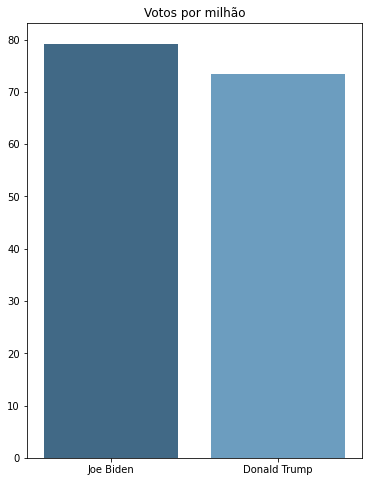

In [15]:
fig = plt.subplots(figsize=(6, 8))

ax = srn.barplot(x=joe_donald.candidate, y=joe_donald.total.map(lambda x: x/1000000), palette='Blues_d')
ax.set(ylabel='', xlabel= '')
ax.set_title('Votos por milhão')